In [1]:
import torch
from torchvision.datasets import MNIST

In [2]:
train_ds  = MNIST(root = "data", train = True, download = True) # for train
test_ds  = MNIST(root = "data", train = False, download = True) # for test

100%|██████████| 9912422/9912422 [00:00<00:00, 90987642.18it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 30299072.99it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 34507164.47it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 3401272.77it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [3]:
len(train_ds)

60000

In [4]:
len(test_ds)

10000

In [5]:
im, gt = train_ds[323]

In [6]:
display(im)

In [7]:
print(type(gt))

<class 'int'>


In [8]:
# Image values range from 0~255 
# Images can be grayscale and RGB (color). Grayscale images have one channel; and RGB images have 3 channels

In [9]:
import numpy as np
im_array = np.array(im)
print(im_array)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 191 255  64
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 191 255 255   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  64 255 255 191   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  64 255 255 191  64   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 255 255 255  64   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 255 255 255 128   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  64 255 255 191   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  64 255 255 191  64   0   

In [10]:
im.size

(28, 28)

(-0.5, 27.5, 27.5, -0.5)

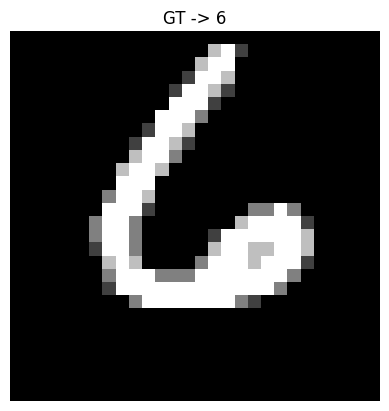

In [11]:
from matplotlib import pyplot as plt

plt.imshow(im, cmap = "gray")
plt.title(f"GT -> {gt}")
plt.axis('off')

In [12]:
# Augmentation (transformation) library
from torchvision import transforms as T

def get_ds(root):
    
    """
    
    This function get a to save data and returns train and test datasets.
    
    Parameter:
        
        root    - path to save the data, str;
        
    
    """
    
    # Initialize transformations (augmentations)
    tr_tfs = T.Compose( [T.RandomHorizontalFlip(),  # horizontal flip
                         T.ToTensor(), # PIL Image -> tensor; (0~1) # (im_h, im_w, im_ch) -> (im_ch, im_h, im_w)
                         T.Normalize(mean = 0.5, std = 0.5) ] ) # 1 channel bo'lgani uchun bitta mean/std value ishlatiladi 
    
    test_tfs = T.Compose( [T.ToTensor(), # PIL Image -> tensor; (0~1) # (im_w, im_h, ch) -> (im_ch, im_h, im_w)
                           T.Normalize(mean = 0.5, std = 0.5) ] ) # (0~1) -> (0~255)
    
    train_ds  = MNIST(root = root, train = True, transform = tr_tfs, download = True) # for train 
    test_ds  = MNIST(root = root, train = False, transform = test_tfs, download = True) # for test
    
    return train_ds, test_ds

ds, test_ds = get_ds("data")

In [13]:
im, gt = ds[0]
torch.unique(im)

tensor([-1.0000, -0.9922, -0.9843, -0.9765, -0.9294, -0.9137, -0.8902, -0.8745,
        -0.8588, -0.8196, -0.8118, -0.8039, -0.7961, -0.7882, -0.7647, -0.7255,
        -0.7176, -0.6941, -0.6627, -0.6471, -0.6392, -0.6157, -0.5686, -0.5608,
        -0.4980, -0.4824, -0.4510, -0.3882, -0.3725, -0.3647, -0.3569, -0.2941,
        -0.2706, -0.2627, -0.1608, -0.1529, -0.1059, -0.0667, -0.0118, -0.0039,
         0.0196,  0.0353,  0.0431,  0.0588,  0.0667,  0.0902,  0.1608,  0.1765,
         0.2078,  0.2235,  0.2549,  0.3020,  0.3333,  0.3412,  0.3490,  0.3725,
         0.4275,  0.4353,  0.4588,  0.4667,  0.4902,  0.5294,  0.5529,  0.5765,
         0.6078,  0.6235,  0.6627,  0.6706,  0.7176,  0.7333,  0.7647,  0.7725,
         0.7961,  0.8667,  0.8824,  0.8902,  0.8980,  0.9137,  0.9373,  0.9529,
         0.9608,  0.9686,  0.9765,  0.9843,  1.0000])

In [14]:
from torch.utils.data import random_split, DataLoader

In [15]:
tr_length = int(len(ds) * 0.9) # 90% of ds
tr_ds, val_ds = random_split(ds, [tr_length, len(ds) - tr_length] )
print(len(tr_ds)); print(len(val_ds)); print(len(test_ds))

54000
6000
10000


In [16]:
# cpu da data bitta bitta ko'rib chiqiladi; gpu da esa parallel ko'rib chiqiladi
# misol uchun cpu 1 sekundda 1ta image ko'rsa; gpu 1 sekundda (batch) ta image ni ko'ra oladi -> parallel computation ; size of mini_batch depends on gpu memory
# batch lar bu data ni qismlar ga bo'linggan holati; 54000 ta image bo'lsa mini_batch_size = 100, 54000 / 100 = 540 ta batch lardan iborat bo'ladi;
# batch larni yaratib beradigan function bu dataloader; Pytorrch da train qilayotganimizda dataset asosida dataloader ni yaratishimiz kerak.

In [17]:
bs = 128; # size of mini batch odatda 2 ni darajasi sifatida olinadi; 256, 512, 1024 ...
tr_dl = DataLoader(dataset = tr_ds, batch_size = bs, shuffle = True, num_workers = 8, drop_last = False) # data ni avval cpu bilan chaqirib olamiz; num_workers = cpu ni toshlari soni
val_dl = DataLoader(dataset = val_ds, batch_size = bs, shuffle = False, num_workers = 8)
test_dl = DataLoader(dataset = test_ds, batch_size = bs, shuffle = False, num_workers = 8)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [18]:
# Assignment 
print(len(tr_dl)); print(len(val_dl)); print(len(test_dl))

422
47
79


In [19]:
batch = next(iter(tr_dl))
print(batch[0].shape); print(batch[1].shape)

torch.Size([128, 1, 28, 28])
torch.Size([128])


# Custom Model

In [20]:
x = torch.rand(1, 3)
print(x.shape)
print(x.T.shape)

torch.Size([1, 3])
torch.Size([3, 1])


In [21]:
x = torch.rand(1, 3) # (1, 3) x (3, 2) = (1, 2) # (1, 7) -> 1-sample da 7ta feature bor degani : education, lunch, math_score ... 
w = torch.rand(2, 3)
print(torch.matmul(x, w.T).shape)

torch.Size([1, 2])


In [22]:
lin = torch.nn.Linear(in_features = 3, out_features = 2) # (20 + 30 + 40) -> (44.843 + 45.8454) -> (90)
print(lin(x).shape)

torch.Size([1, 2])


# torch input shape -> (bs, im_ch, im_h, im_w) -> (4D)

In [23]:
class CustomModel(torch.nn.Module):
    
    def __init__(self, in_feats, out_feats, num_classes): 
        super().__init__()
        
        self.linear_layer_1 = torch.nn.Linear(in_features = in_feats, out_features = out_feats)
        self.activation = torch.nn.ReLU() 
        self.linear_layer_2 = torch.nn.Linear(in_features = out_feats, out_features = out_feats // 2)
        self.out_layer = torch.nn.Linear(in_features = out_feats // 2, out_features = num_classes)
        self.softmax = torch.nn.Softmax(dim = 1)

    def forward(self, inp): 
        
        # inp_shape = 4D (bs, im_ch, im_h, im_w) 4D -> 2D
        bs = inp.shape[0]
        inp = inp.view(bs, -1) # (bs, im_ch, im_h, im_w) -> (bs, im_ch * im_h * im_w) 4D -> 2D
        inp = self.linear_layer_1(inp) # input: (bs, 784); output: (bs, 392) 
        inp = self.activation(inp) # doesnot change feature dimensions input: (bs, 392); output: (bs, 392) 
        inp = self.linear_layer_2(inp) # input: (bs, 392); output: (bs, 392 // 2 = 196)  
        out = self.out_layer(inp)
        
        return self.softmax(out)
    
inp = torch.rand(1, 1, 28, 28) # (bs, im_ch, im_h, im_w) -> 4D -> 2D (bs, features)
model = CustomModel(in_feats = 28 * 28 * 1, out_feats = (28 * 28) // 2, num_classes = 10) # 784 -> 1568 - X ; 784 -> 392
print(model(inp))

tensor([[0.1110, 0.0932, 0.0884, 0.0966, 0.0993, 0.1003, 0.1101, 0.0966, 0.0991,
         0.1056]], grad_fn=<SoftmaxBackward0>)


In [24]:
for name, params in model.named_parameters():
    print(f"{name} parameterda {params.numel()} ta parameter bor.")
print(f"Modelning umumiy parameter lar soni -> {sum(params.numel() for params in model.parameters())}")

linear_layer_1.weight parameterda 307328 ta parameter bor.
linear_layer_1.bias parameterda 392 ta parameter bor.
linear_layer_2.weight parameterda 76832 ta parameter bor.
linear_layer_2.bias parameterda 196 ta parameter bor.
out_layer.weight parameterda 1960 ta parameter bor.
out_layer.bias parameterda 10 ta parameter bor.
Modelning umumiy parameter lar soni -> 386718


In [25]:
vals = torch.arange(5, 10, 1)
print(vals)
relu_outs = torch.nn.ReLU()(vals)
print(relu_outs)

tensor([5, 6, 7, 8, 9])
tensor([5, 6, 7, 8, 9])


In [26]:
outputs = torch.FloatTensor([-0.0754, -0.1027, -0.0945,  0.0784,  0.0233, -0.1027,  0.1343, -0.0463, 0.0369,  0.1287])
print(outputs)
torch.nn.Softmax()(outputs)

tensor([-0.0754, -0.1027, -0.0945,  0.0784,  0.0233, -0.1027,  0.1343, -0.0463,
         0.0369,  0.1287])


<ipython-input-26-b6ff76c143d8>:3: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  torch.nn.Softmax()(outputs)


tensor([0.0925, 0.0901, 0.0908, 0.1079, 0.1021, 0.0901, 0.1141, 0.0953, 0.1035,
        0.1135])

### Epoch is when a model sees all examples once. 
### Images in the dataset = 100; Batch_size = 10; Iteration - 100 // 10 = 10? In this case, 10 iterations == 1 epoch;
### Images in the dataset = 100; Batch_size = 10; Epoch = 10; Iteration - 1 epoch has (100 // 10) = 10 iterations, then 10 epochs have 10 * 10 = 100

In [27]:
# w1 = w0 - lr * w0.grad # w0 = 3, w1 = 70

epochs = 10
device = "cpu" # "cuda"
model.to(device) # model is automatically on cpu at first. so we need to switch to gpu
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model.parameters(), lr = 0.001)

In [28]:
# w1 = w0 - lr * w0.grad

In [29]:
class EarlyStopping:
    
    def __init__(self, metric_to_track, patience, threshold):
        
        assert metric_to_track in ["loss", "acc"], "Loss (loss) yoki accuracy (acc) dan birini tanlang"
        self.metric_to_track, self.patience, self.threshold = metric_to_track, patience, threshold
        self.counter, self.early_stop = 0, False
        
        self.best_value = torch.tensor(float("inf")) if metric_to_track == "loss" else torch.tensor(float("-inf"))
        
    def __call__(self, current_value): 
        # current_value (epochdan loss) = 0.7; best_value = 0.82; threshold = 0.1; loss kamayyapti
        # current_value = 0.9; best_value = 0.82; threshold = 0.1; loss oshyapti
        print(f"{self.metric_to_track} ni kuzatyapmiz!")
        
        if self.metric_to_track == "loss":
            
            if current_value > (self.best_value - self.threshold): self.counter += 1
            else: self.best_value = current_value
                
        elif self.metric_to_track == "acc":
            
            if current_value < (self.best_value + self.threshold): self.counter += 1
            else: self.best_value = current_value
                
        if self.counter >= self.patience:
            print(f"{self.metric_to_track} {self.counter} marta o'zgarmagani uchun trainni to'xtatyapman!")
            self.early_stop = True   
            
# early_stopping = EarlyStopping(metric_to_track = "loss", patience = 2, threshold = 0.01)
early_stopping = EarlyStopping(metric_to_track = "acc", patience = 2, threshold = 0.01)
early_stopping

In [30]:
from tqdm import tqdm
import os

print("Train boshlandi")

best_acc = 0

for epoch in range(epochs):
    # if epoch == 1: break
    
    epoch_loss, epoch_acc, total = 0, 0, 0
    
    for idx, batch in tqdm(enumerate(tr_dl)):
        
        ims, gts = batch # ims and gts are automatically on cpu at first. so we need to switch to gpu
        ims, gts = ims.to(device), gts.to(device)
        
        preds = model(ims)
        # logits
        loss = loss_fn(preds, gts) # loss is tensor -> float value
        # print(loss)
        
        total += ims.shape[0] # bs (bs, im_chs, im_h, im_w)
        pred_val, pred_cls = torch.max(preds.data, dim = 1)
        # if idx == 0: break
        epoch_acc += (pred_cls == gts).sum().item() # bs ta pred dan nechtasi gts ga tengligini hisoblaydi: 128tadan  100tasi gt ga teng bo'lsa = 100 + 110 + 120 + 137
        epoch_loss += loss.item() # 2 + 2 + 2 = 2 + 2 + 2 + 2 10ta son chiqadi / 10
        
        optimizer.zero_grad()
        loss.backward() # batch_size ta image uchun hisoblangan
        optimizer.step()
        
    print(f"Epoch {epoch + 1} train is finished!")
    print(f"Epoch {epoch + 1} train loss -> {epoch_loss / len(tr_dl)}!")
    print(f"Epoch {epoch + 1} train acc -> {epoch_acc / total}!")
    
    model.eval()
    with torch.no_grad():
        val_epoch_loss, val_epoch_acc, val_total = 0, 0, 0
        
        for idx, batch in enumerate(val_dl):
            ims, gts = batch
            ims, gts = ims.to(device), gts.to(device)
            val_total += ims.shape[0]
            
            preds = model(ims) # oputputs are probabilities
            loss = loss_fn(preds, gts)
            _, pred_cls = torch.max(preds.data, dim = 1)
            val_epoch_loss += loss.item()
            val_epoch_acc += (pred_cls == gts).sum().item()
            
        val_acc = val_epoch_acc / val_total
        val_loss = val_epoch_loss / len(val_dl)
        
        print(f"Epoch {epoch + 1} validation is finished!")
        print(f"Epoch {epoch + 1} validation loss -> {val_loss}!")
        print(f"Epoch {epoch + 1} validation acc -> {val_acc}!") 
        
#         early_stopping(current_value = val_loss)
        early_stopping(current_value = val_acc)
        
        if early_stopping.early_stop:
            break
            
        
        # 1-epochda val_acc = 60; best_acc = 0: 60 > 0; best_acc = 60
        # 2-epochda val_acc = 65; best_acc = 60: 65 > 60; best_acc = 65
        # 3-epochda val_acc = 63; best_acc = 65: 63 > 65 will not run
        
        if val_acc > best_acc:
            os.makedirs("saved_models", exist_ok = True)
            torch.save(model.state_dict(), f"saved_models/mnist_best_model.pth") # model.state_dict() returns trained weights and biases
            best_acc = val_acc

Train boshlandi


422it [00:27, 15.52it/s]

Epoch 1 train is finished!
Epoch 1 train loss -> 1.7375732098145507!
Epoch 1 train acc -> 0.7291481481481481!


Epoch 1 validation is finished!
Epoch 1 validation loss -> 1.6225754098689302!
Epoch 1 validation acc -> 0.8398333333333333!
acc ni kuzatyapmiz!


422it [00:26, 15.95it/s]

Epoch 2 train is finished!
Epoch 2 train loss -> 1.5910577067831682!
Epoch 2 train acc -> 0.8730555555555556!


Epoch 2 validation is finished!
Epoch 2 validation loss -> 1.5691496235259035!
Epoch 2 validation acc -> 0.8931666666666667!
acc ni kuzatyapmiz!


422it [00:21, 19.96it/s]

Epoch 3 train is finished!
Epoch 3 train loss -> 1.5578183517636846!
Epoch 3 train acc -> 0.9053888888888889!


Epoch 3 validation is finished!
Epoch 3 validation loss -> 1.554426167873626!
Epoch 3 validation acc -> 0.909!
acc ni kuzatyapmiz!


422it [00:20, 21.09it/s]

Epoch 4 train is finished!
Epoch 4 train loss -> 1.5477849476710315!
Epoch 4 train acc -> 0.9147037037037037!


Epoch 4 validation is finished!
Epoch 4 validation loss -> 1.5488988795179002!
Epoch 4 validation acc -> 0.9126666666666666!
acc ni kuzatyapmiz!


422it [00:20, 20.10it/s]

Epoch 5 train is finished!
Epoch 5 train loss -> 1.5404165008621757!
Epoch 5 train acc -> 0.9216111111111112!


Epoch 5 validation is finished!
Epoch 5 validation loss -> 1.563814974845724!
Epoch 5 validation acc -> 0.8978333333333334!
acc ni kuzatyapmiz!
acc 2 marta o'zgarmagani uchun trainni to'xtatyapman!


### Inference (Test Phase)

In [31]:
model.load_state_dict(torch.load("saved_models/mnist_best_model.pth"))
print("Model's trainable parameters are succesfully loaded!")
model.to(device)

Model's trainable parameters are succesfully loaded!


CustomModel(
  (linear_layer_1): Linear(in_features=784, out_features=392, bias=True)
  (activation): ReLU()
  (linear_layer_2): Linear(in_features=392, out_features=196, bias=True)
  (out_layer): Linear(in_features=196, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

In [32]:
ims, gts = next(iter(test_dl))
# print(ims.shape)
# print(gts)

preds, images, lbls = [], [], []

for im, gt in zip(ims, gts):
    im, gt = im.to(device), gt.to(device)
    preds_ = model(im) # 10 ta prob scores
    _, pred_cls = torch.max(preds_, dim = 1)
    images.append(im)
    preds.append(pred_cls.item())
    lbls.append(gt)
print(len(preds))
print(len(images))


128
128


In [33]:
# permute transpose for high dimensions: 1,28,28 -> 28,28,1
def tensor_2_im(t): return (t * 255).detach().cpu().permute(1,2,0).numpy().astype(np.uint8)

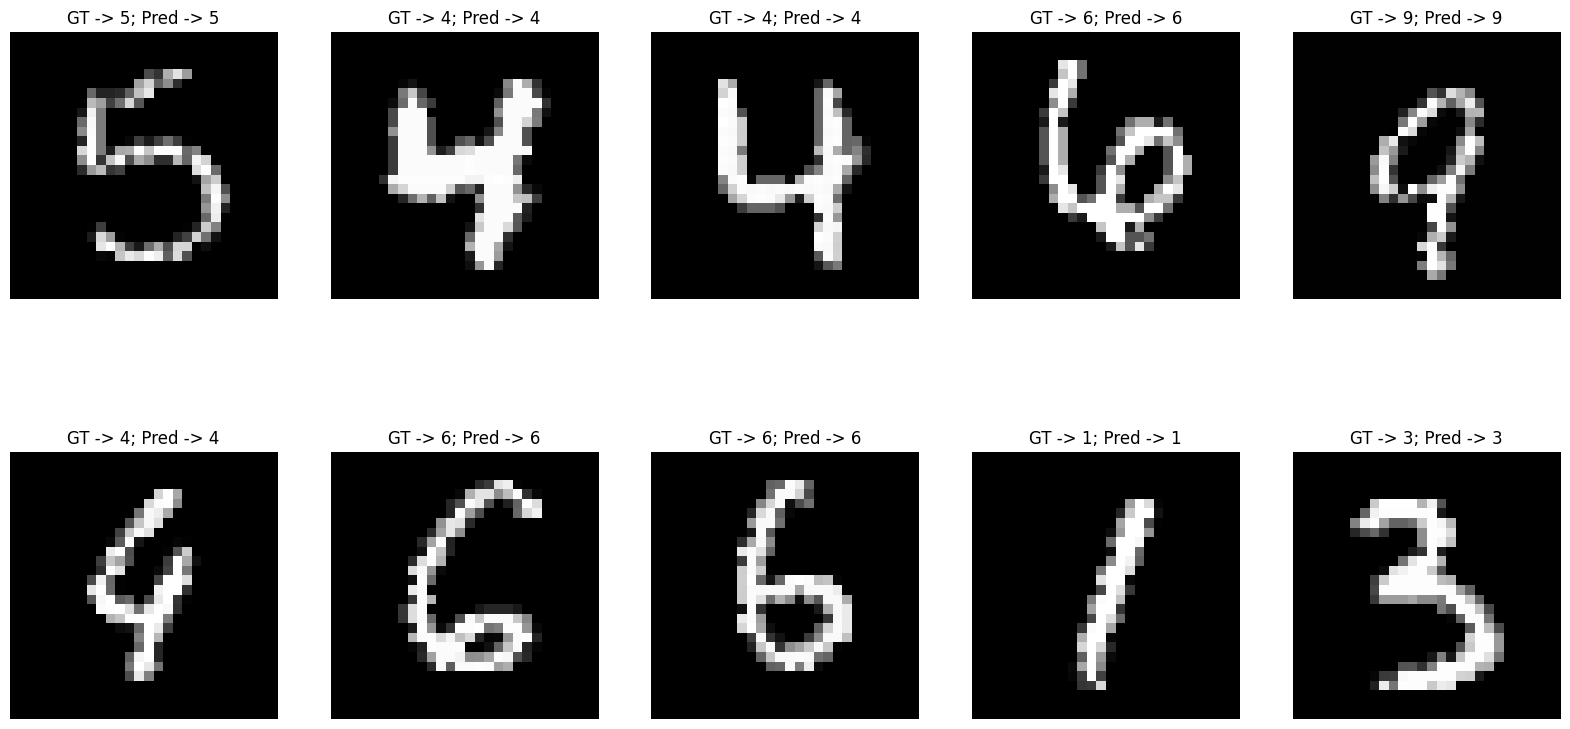

In [34]:
row = 2
num_ims = 10

plt.figure(figsize = (20, 10))
indekslar = np.random.randint(low = 0, high = len(preds), size = num_ims)

for idx, indeks in enumerate(indekslar):
    # if idx == 1: break
    im = ims[int(indeks)]
    gt = gts[int(indeks)]
    pred = preds[int(indeks)]
    
    plt.subplot(row, num_ims // row, idx + 1)
    plt.imshow(tensor_2_im(im), cmap = 'gray')
    # plt.imshow(im, cmap = 'gray')
    plt.axis('off')
    plt.title(f"GT -> {gt}; Pred -> {pred}")

## **Zero to Hero : course paper**